In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

##EDA


In [ ]:
import kagglehub

path = kagglehub.dataset_download("joniarroba/noshowappointments")

In [ ]:
import os
files = os.listdir(path)
path = path + '/' + files[0]
print(path)

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [ ]:
data = pd.read_csv(path)

data.shape

(110527, 14)

In [ ]:
print(data.isnull().sum())

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [ ]:
from tabulate import tabulate
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
data_p = data.drop(['PatientId', 'AppointmentID'], axis=1)
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [ ]:
data_p


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


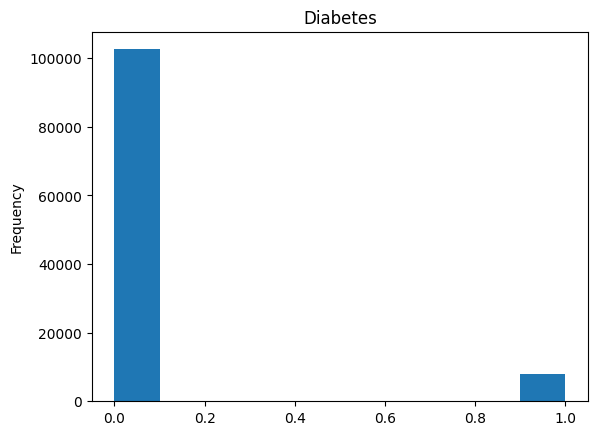

In [ ]:
data_p['Diabetes'].plot(kind='hist', title='Diabetes')
plt.show()

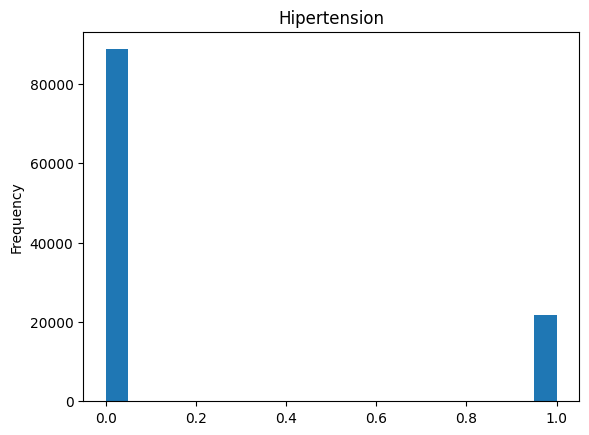

In [ ]:
data_p['Hipertension'].plot(kind='hist', bins=20, title='Hipertension')
plt.show()

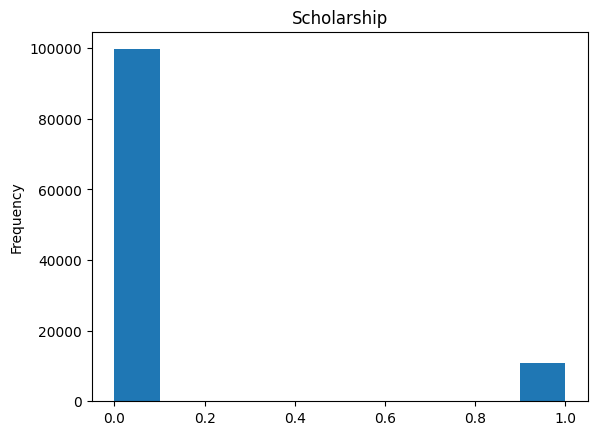

In [ ]:
from matplotlib import pyplot as plt
data_p['Scholarship'].plot(kind='hist',  title='Scholarship')
plt.show()

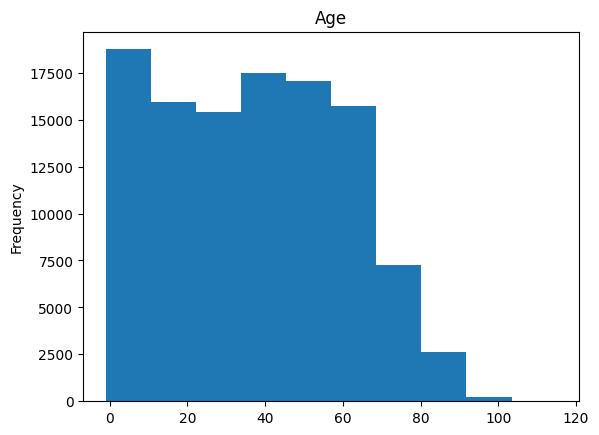

In [ ]:
data_p['Age'].plot(kind='hist', title='Age')
plt.show()

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data_p = data_p[data_p["Age"] >= 0] #Wtf am I doing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_p['Gender'] = le.fit_transform(data_p['Gender'])
data_p["Neighbourhood"] = le.fit_transform(data_p["Neighbourhood"])
data_p['No-show'] = le.fit_transform(data_p['No-show']) # No -> 0
data_p['AppointmentDay'] = le.fit_transform(data_p['AppointmentDay'])
data_p['ScheduledDay'] = le.fit_transform(data_p['ScheduledDay'])
data_p.head()

<ipython-input-14-a8cc28d2d6f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p['Gender'] = le.fit_transform(data_p['Gender'])
<ipython-input-14-a8cc28d2d6f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_p["Neighbourhood"] = le.fit_transform(data_p["Neighbourhood"])
<ipython-input-14-a8cc28d2d6f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,0,27741,0,62,39,0,1,0,0,0,0,0
1,1,27503,0,56,39,0,0,0,0,0,0,0
2,0,27538,0,62,45,0,0,0,0,0,0,0
3,0,27708,0,8,54,0,0,0,0,0,0,0
4,0,27497,0,56,39,0,1,1,0,0,0,0


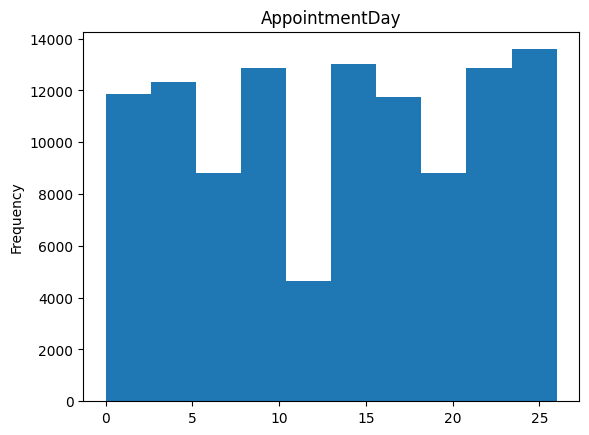

In [ ]:
data_p['AppointmentDay'].plot(kind='hist', title='AppointmentDay')
plt.show()

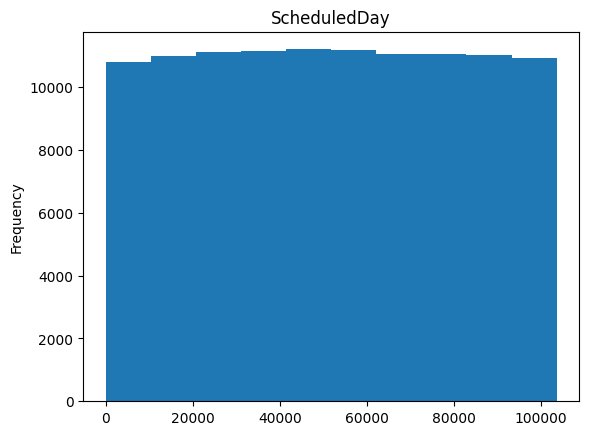

In [ ]:
data_p['ScheduledDay'].plot(kind='hist', title='ScheduledDay')
plt.show()

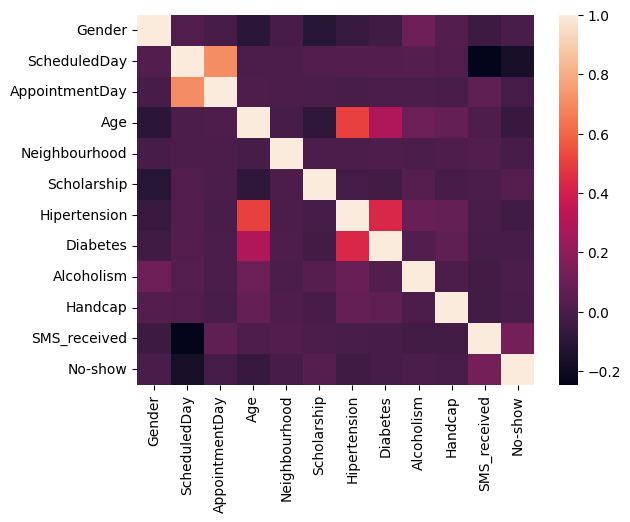

In [ ]:
sns.heatmap(data_p.corr(),  annot=False)
plt.show()

##Model 1


In [ ]:
params = {}
n = 1
class layer():

  def __init__(self, n_neurons, n_features, activation) -> None:
    self.weights = np.random.randn(n_neurons, n_features)
    self.bias = np.zeros((1, n_neurons))
    self.activation = activation
    params["w" + str(n)] = self.weights
    params["b" + str(n)] = self.bias
    n+=1

  def activation(self, x):
    if self.activation == 'relu':
      return np.maximum(0, x)
    if self.activation == 'softmax':
      exps = np.exp(x - np.max(x, axis=1, keepdims=True))
      return exps / np.sum(exps, axis=1, keepdims=True)
    if self.activation == 'tanh':
      return np.tanh(x)

  def next(self, x):
    self.inp = x
    self.output = self.activation(np.dot(x, self.weights.T) + self.bias)
    return self.output

  def activation_derivative(self, x):
    if self.activation == 'relu':
      return (x >0).long()
    if self.activation == 'tanh':
      return 1 - np.tanh(x)**2

class my_ffnn():

  def __init__(self, n_layer = 6) -> None:

    #Making the layers manually typed
    self.layer1 = layer(64, 11, 'relu')
    self.layer2 = layer(32, 64, 'relu')
    self.layer3 = layer(16, 32, 'relu')
    self.layer4 = layer(8, 16, 'relu')
    self.layer5 = layer(4, 8, 'relu')
    self.layer6 = layer(2, 4, 'softmax')

  def forward(self, x):
    x= next(self.layer1, x)
    x= next(self.layer2, x)
    x= next(self.layer3, x)
    x= next(self.layer4, x)
    x= next(self.layer5, x)
    x= next(self.layer6, x)

    return x

  def back_prop(self, x, y):

    dw6 = self.forward(x) - y

    gradient_tape = [ dw6, dw5, dw4, dw3, dw2, dw1 ]
    layer_tape = [ self.layer6, self.layer5, self.layer4, self.layer3, self.layer2, self.layer1 ]

    for i in range(5):

      gradient_current = gradient_tape[i]
      gradient_previous = gradient_tape[i+1]
      current_layer = layer_tape[i]
      previous_layer = layer_tape[i+1]

      dw = np.dot(gradient_previous.T, current_layer.inp)
      db = np.sum(gradient_previous, axis=0, keepdims=True)

      da_previous  = np.dot(dw, current_layer.weights)
      dz_previous = previous_layer.activation_derivative(da_previous)
      gradient_tape[i+1] = dz_previous

    layer1 = layer_tape[-1]
    dw1 = np.dot(layer1.inp.T, dz1)
    db1 = np.sum(dw1, axis=0, keepdims=True)
  return gradient_tape

class Adam():

  def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    self.learning_rate = learning_rate
    self.beta1 = beta1
    self.beta2 = beta2
    self.epsilon = epsilon
    self.m = 0
    self.v = 0
    self.t = 0

  def initialize(self, params):
    l = len(params)
    v = {}
    s = {}

    for i in rnage(1, l+1):
      v["dW" + str(i)] = np.zeros(params["W" + str(i)].shape)
      v["db" + str(i)] = np.zeros(params["b" + str(i)].shape)

      s["dW" + str(i)] = np.zeros(params["W" + str(i)].shape)
      s["db" + str(i)] = np.zeros(params["b" + str(i)].shape)

    return v, s

  def update(self, params, grads, v, s, t, lr):
    v, s = initialize(params)
    l = len(params)

    for i in range(1, l+1):
      v["dW" + str(i)] = self.beta1 * v["dW" + str(i)] + (1-self.beta1) * grads["dW" + str(i)]
      v["db" + str(i)] = self.beta1 * v["db" + str(i)] + (1-self.beta1) * grads["db" + str(i)]

      v["dW" + str(i)] = v["dW" + str(i)] / (1 - self.beta1**self.t)
      v["db" + str(i)] = v["db" + str(i)] / (1 - self.beta1**self.t)

      s["dW" + str(i)] = beta2*(s["dW" + str(l)]) + (1-beta2)*(grads['dW' + str(l)]**2)
      s["db" + str(i)] = beta2*(s["db" + str(l)]) + (1-beta2)*(grads['db' + str(l)]**2)

      s["dW" + str(i)] = s["dW" + str(i)] / (1 - self.beta2**self.t)
      s["db" + str(i)] = s["db" + str(i)] / (1 - self.beta2**self.t)

      params["W" + str(i)] = params["W" + str(i)] - lr * v["dW" + str(i)] / (np.sqrt(s["dW" + str(i)]) + self.epsilon)
      params["b" + str(i)] = params["b" + str(i)] - lr * v["db" + str(i)] / (np.sqrt(s["db" + str(i)]) + self.epsilon)

    return params, v, s




In [ ]:
model1 = my_ffnn()


##Model 2
Written in pytorch



In [ ]:
import torch
import torch.nn as nn

class ffnn(nn.Module):
  def __init__(self):
    super (ffnn, self).__init__()
    self.layer1 = nn.Linear(11, 64)
    self.layer2 = nn.Linear(64, 32)
    self.layer3 = nn.Linear(32, 16)
    self.layer4 = nn.Linear(16, 8)
    self.layer5 = nn.Linear(8, 4)
    self.layer6 = nn.Linear(4, 2)

    self.RELU = nn.ReLU()
    self.LRELU = nn.LeakyReLU(negative_slope = 0.01)
    self.TANH = nn.Tanh()
    self.SIGMOID = nn.Sigmoid()
    self.SOFTMAX = nn.Softmax(dim=1)
    self.dropout1 = nn.Dropout(p=0.5)
    self.dropout2 = nn.Dropout(p=0.3)

  def forward(self, x):
    x = self.layer1(x)
    x = self.LRELU(x)
    x = self.dropout1(x)
    x = self.layer2(x)
    x = self.LRELU(x)
    x = self.dropout1(x)
    x = self.layer3(x)
    x = self.TANH(x)
    x = self.dropout1(x)
    x = self.layer4(x)
    x = self.LRELU(x)
    x = self.dropout2(x)
    x = self.layer5(x)
    x = self.LRELU(x)
    x = self.dropout2(x)
    x = self.layer6(x)

    return x

In [ ]:
class custom_loss(nn.Module):
  def __init__(self, cost_matrix) -> None:
    super(custom_loss, self).__init__()
    self.cost_matrix = cost_matrix

  def forward(self, logits, labels):
    probs = torch.nn.functional.softmax(logits, dim=1)
    cost = self.cost_matrix[labels]
    cost = (cost * probs).sum()
    return cost.mean()

In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=1.5, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        ce_loss = nn.CrossEntropyLoss(weight=class_weights)(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1-pt)**self.gamma * ce_loss
        return focal_loss.mean()

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

device = torch.device("cuda") if torch.cuda.is_available() else torch.device('cpu')

model = ffnn()
model = model.to(device)

class_weights = torch.tensor([total/negatives, (total)/positives])
class_weights = class_weights / class_weights.sum()
class_weights = class_weights.to(device)

# positive_weight = torch.tensor([negatives / positives], dtype=torch.float32).to(device)
#loss = nn.CrossEntropyLoss(weight=class_weights)

cost_matrix = torch.tensor([[0, 3],
                            [9.8, 0]])
loss = custom_loss(cost_matrix)

# loss = FocalLoss()
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


def train(model, loss_function, dataset, dataset_cv, epochs):
   loss_history = []
   loss_history_cv = []
   model.train()
   optimizer = optim.Adam(model.parameters(), 1e-3, weight_decay = 1e-4)

   for epoch in range(epochs):
    total_loss = 0
    total_loss_cv = 0
    correct_prediction = 0
    total_prediction = 0
    for (x,y),(x_cv,y_cv) in zip(dataset, dataset_cv):

      x = x.clone().detach().to(device)
      x_cv = x_cv.clone().detach().to(device)
      y = y.clone().detach().to(device)
      y_cv = y_cv.clone().detach().to(device)
      y= y.long()
      y_cv = y_cv.long()

      logits = model(x)
      logits = logits.squeeze(1)
      logits_cv = model(x_cv)
      logits_cv = logits_cv.squeeze(1)
      loss = loss_function(logits, y)
      loss_cv = loss_function(logits_cv, y_cv)
      total_loss += loss.item()*x.shape[0]#forgot to scale'em up
      total_loss_cv += loss_cv.item()*x_cv.shape[0]

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      y_hat = torch.argmax(logits, dim = 1)
      # y_hat = (y_hat>0.5).float()
      correct_prediction += (y_hat == y).sum().item()
      total_prediction += y_hat.shape[0]

    epoch_loss = total_loss / total_prediction
    epoch_loss_cv = total_loss_cv / total_prediction
    loss_history.append(epoch_loss)
    loss_history_cv.append(epoch_loss_cv)
    epoch_acc = correct_prediction / total_prediction
    clear_output(wait=True)
    if len(loss_history) >= 5:
        plt.plot(moving_average(loss_history), label='Training Loss (smoothed)')
        plt.plot(moving_average(loss_history_cv), label='Validation Loss (smoothed)')
    else:
        plt.plot(loss_history, label='Training Loss')
        plt.plot(loss_history_cv, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
   return loss_history, loss_history_cv


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
scaler = StandardScaler()

X = data_p.drop('No-show', axis=1).values
Y = data_p['No-show'].values

X = scaler.fit_transform(X)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.long)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dataset = TensorDataset(X_train, Y_train)
dataset = DataLoader(dataset, batch_size=1024, shuffle=True)

dataset_cv = TensorDataset(X_test, Y_test)
dataset_cv = DataLoader(dataset_cv, batch_size=1024, shuffle=True)

negatives = (Y_train == 0).sum().item()
positives = (Y_train == 1).sum().item()
total = Y_train.shape[0]

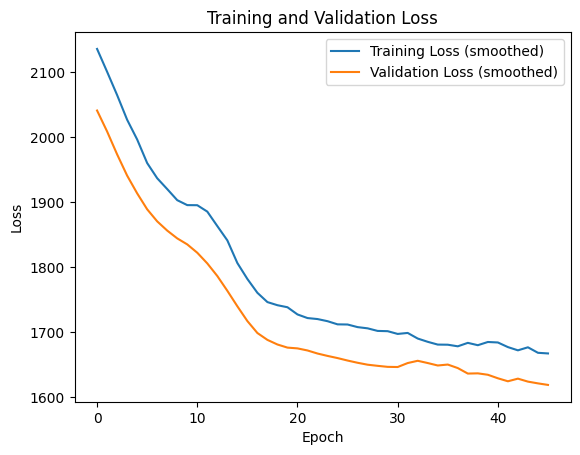

In [ ]:
loss_his, loss_his_cv= train(model, loss, dataset, dataset_cv,50)

n += 1

Accuracy: 0.6467
F1 Score: 0.4159
PR AUC: 0.2968


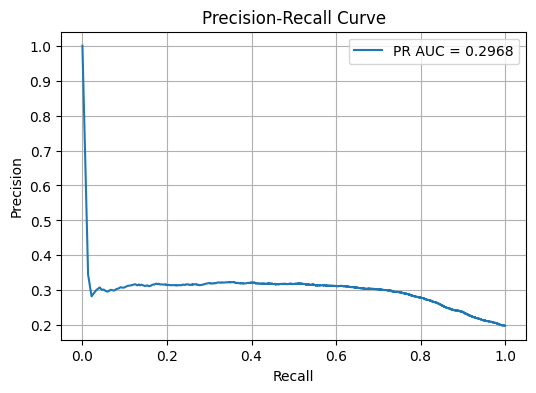

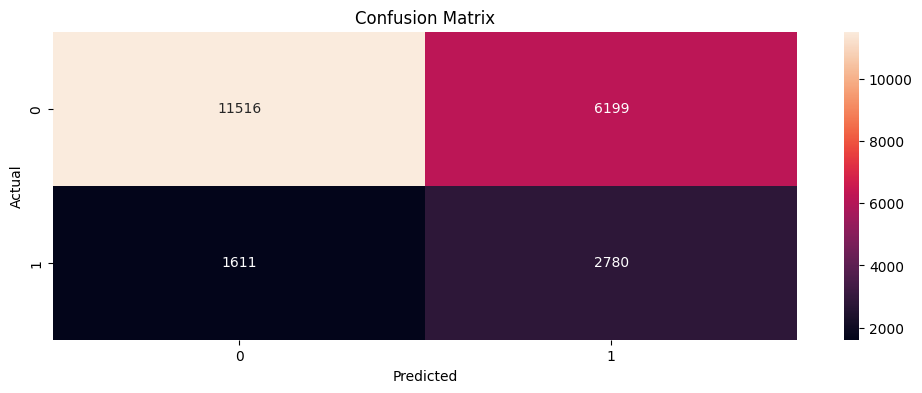

In [ ]:
metrices(model, X_test, Y_test) #Looking for f1 in b/w 0.5-0.6 and PR AUC b/w 0.5-0.6

In [ ]:
torch.save(model.state_dict(), 'model_weights' +str(n) + ".pth")

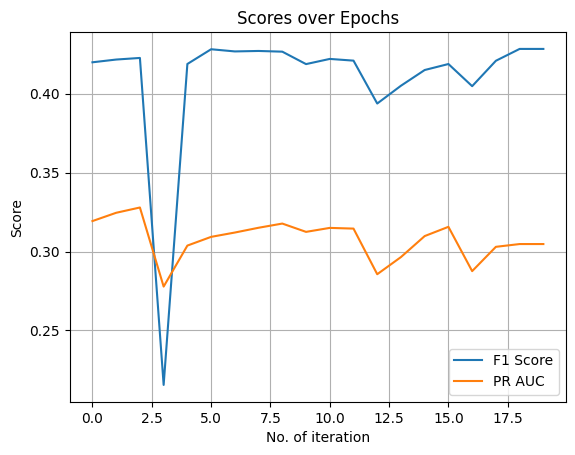

In [ ]:
plt.plot(F1_history, label="F1 Score")
plt.plot(PR_AUC_history, label="PR AUC")
plt.xlabel("No. of iteration")
plt.ylabel("Score")
plt.title("Scores over Epochs")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, precision_recall_curve,
    average_precision_score, confusion_matrix
)
F1_history = []
PR_AUC_history = []
n = 1
def metrices(model, x, y):
  model.eval()
  model = model.to(device)
  x = x.clone().detach().to(device)
  y = y.clone().detach().to(device)
  y = y.long()
  with torch.no_grad():
    logits = model(x)
    y_hat = torch.argmax(logits, dim=1)
    # y_hat = torch.nn.functional.softmax(logits, dim=1)[:, 1]
    # y_hat = (y_hat != 0).long()
    # y_hat = torch.round(torch.sigmoid(logits))
    correct_prediction = (y_hat == y).sum().item()
    total_prediction = y_hat.shape[0]
    y_prob = torch.nn.functional.softmax(logits, dim=1)[:, 1]

    acc = accuracy_score(y.cpu().numpy(), y_hat.cpu().numpy())
    print(f"Accuracy: {acc:.4f}")

    f1 = f1_score(y.cpu(), y_hat.cpu())
    print(f"F1 Score: {f1:.4f}")
    F1_history.append(f1)

    precision, recall, _ = precision_recall_curve(y.cpu().numpy(), y_prob.cpu().numpy())
    pr_auc = average_precision_score(y.cpu().numpy(), y_prob.cpu().numpy())
    PR_AUC_history.append(pr_auc)
    print(f"PR AUC: {pr_auc:.4f}")
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid()
    plt.show()

    cm = confusion_matrix(y.cpu(), y_hat.cpu())
    plt.figure(figsize=(12, 4))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()